In [2]:
import numpy as np 
import pandas as pd 
import os
from collections import Counter
import tensorflow as tf
import cv2
import glob
import skimage
import seaborn as sn
import preprocessing
from tqdm import tqdm
from io import BytesIO
from PIL import Image
from os import listdir
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
# Création de listes vides pour stocker les images et les étiquettes.
images=[] 
labels=[]
# Création d'un dictionnaire de caractéristiques qui spécifie le type et la longueur des caractéristiques que nous allons extraire.
feature_dictionary = {  
    'label': tf.io.FixedLenFeature([], tf.int64),# La caractéristique 'label' est un entier 64 bits avec une longueur fixe.
    'label_normal': tf.io.FixedLenFeature([], tf.int64), # La caractéristique 'label_normal' est un entier 64 bits avec une longueur fixe.# La caractéristique 'label_normal' est un entier 64 bits avec une longueur fixe.
    'image': tf.io.FixedLenFeature([], tf.string)  # La caractéristique 'image' est une chaîne de caractères avec une longueur fixe.
    }

In [4]:
def _parse_function(example, feature_dictionary=feature_dictionary):
    parsed_example = tf.io.parse_example(example, feature_dictionary)
    return parsed_example

# Fonction pour lire les données à partir d'un fichier TFRecord.
def read_data(filename):
    # Création d'un objet TFRecordDataset à partir du fichier.
    full_dataset = tf.data.TFRecordDataset(filename, num_parallel_reads=tf.data.experimental.AUTOTUNE)
    
    # Mélange du dataset.
    full_dataset = full_dataset.shuffle(buffer_size=31000)
    
    # Mise en cache du dataset pour une lecture plus rapide.
    full_dataset = full_dataset.cache()
    
    # affichage de la taille du dataset.
    print("Size of Training Dataset: ", len(list(full_dataset)))

    # Application de la fonction _parse_function pour extraire les caractéristiques.
    full_dataset = full_dataset.map(_parse_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    print(full_dataset)

    # Boucle à travers chaque exemple dans le dataset.
    for image_features in full_dataset:
        # Extraction et décodage de l'image.
        image = image_features['image'].numpy()
        image = tf.io.decode_raw(image_features['image'], tf.uint8)
        image = tf.reshape(image, [299, 299, 1])
        image = image.numpy()

        # Redimensionnement de l'image à (100, 100).
        image = cv2.resize(image, (100, 100))

        # Ajout de l'image à la liste des images.
        images.append(image)

        # Ajout de l'étiquette correspondante à la liste des étiquettes.
        labels.append(image_features['label_normal'].numpy())

In [5]:
# List of file paths of TFRecord containing the data
filenames=['../Datasets/DDSM + CBIS-DDSM/archive/training10_0/training10_0.tfrecords',
          '../Datasets/DDSM + CBIS-DDSM/archive/training10_1/training10_1.tfrecords',
          '../Datasets/DDSM + CBIS-DDSM/archive/training10_2/training10_2.tfrecords',
          '../Datasets/DDSM + CBIS-DDSM/archive/training10_3/training10_3.tfrecords',
          '../Datasets/DDSM + CBIS-DDSM/archive/training10_4/training10_4.tfrecords']

for file in filenames:
    read_data(file)

# immages and labels 
print(len(images))
print(len(labels))

Size of Training Dataset:  11177
<_ParallelMapDataset element_spec={'image': TensorSpec(shape=(), dtype=tf.string, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'label_normal': TensorSpec(shape=(), dtype=tf.int64, name=None)}>
Size of Training Dataset:  11177
<_ParallelMapDataset element_spec={'image': TensorSpec(shape=(), dtype=tf.string, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'label_normal': TensorSpec(shape=(), dtype=tf.int64, name=None)}>
Size of Training Dataset:  11177
<_ParallelMapDataset element_spec={'image': TensorSpec(shape=(), dtype=tf.string, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'label_normal': TensorSpec(shape=(), dtype=tf.int64, name=None)}>
Size of Training Dataset:  11177
<_ParallelMapDataset element_spec={'image': TensorSpec(shape=(), dtype=tf.string, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'label_normal': TensorSpec(shape=(), dtype=tf.int64, name=None

In [6]:
# Convert list 'images' into NumPy array 'X'
X = np.array(images)

# Convert lista 'labels' into NumPy array 'y'
y = np.array(labels)

# Split the dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021, shuffle=True, stratify=y)

# Get dimension of x_train
(a, b, c) = x_train.shape

# Affiche les dimensions du tableau x_train
print(x_train.shape)

# Reshape x_train to add a color channel dimension
x_train = np.reshape(x_train, (a, b, c, 1))

# Get dimension of x_test
(a, b, c) = x_test.shape

# Reshape x_test to add a color channel dimension
x_test = np.reshape(x_test, (a, b, c, 1))

(44708, 100, 100)


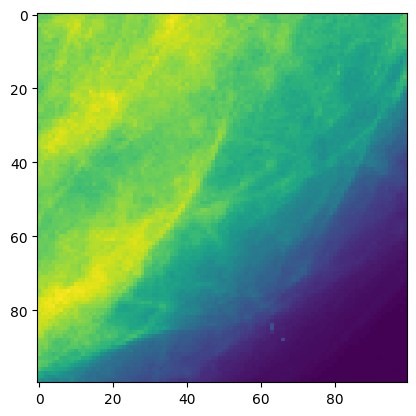

In [8]:
# show image
plt.imshow(x_train[5])
